In [1]:
import numpy as np
import librosa
import os

In [12]:
data_path = os.path.join(os.path.join('data', 'train'), 'human')
human_lst = os.listdir(data_path)
SAMPLE_RATE = 22050

In [21]:
signal, _ = librosa.core.load(os.path.join(data_path,human_lst[0]), sr=SAMPLE_RATE)

In [22]:
signal.shape

(107825,)

In [23]:
signal[:3 * SAMPLE_RATE]

array([-0.00042648, -0.00042165, -0.00053588, ...,  0.00199765,
        0.00387247,  0.00338461], dtype=float32)

In [24]:
np.max(signal)

0.460672

In [25]:
np.min(signal)

-0.5925568

In [29]:
signal = signal / np.max(np.abs(signal) + 1e-6)

In [30]:
np.max(signal)

0.77743024

In [31]:
np.min(signal)

-0.99999905

In [2]:
from mfcc import filename_loader
files, labels = filename_loader(os.path.join('data', 'train'), balanced=False)

In [3]:
np.mean(labels)

0.20644

In [58]:
def load_wav(wav_path, sr=22050):
    aud, sr = librosa.load(wav_path,sr=sr)
    return aud, sr

In [84]:
fr = 22050
idx = 14
signal, sr = load_wav(files[idx], sr=fr)
print(labels[idx])
print(signal.shape, sr)
print(len(signal) / sr)
if len(signal) < 3 * sr:
    diff = 3 * sr - len(signal)
    padding = np.random.randint(diff)
    signal = np.pad(signal, (padding, diff - padding), 'reflect')
else:
    signal = signal[: 3 * sr]
signal = signal / np.max(np.abs(signal))

1.0
(66150,) 22050
3.0


In [85]:
mfcc = librosa.feature.mfcc(signal, sr=sr, n_mfcc=50)

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline

(50, 130)


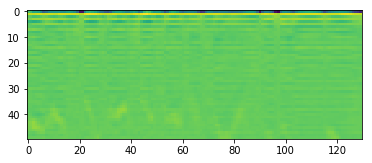

In [87]:
plt.imshow(mfcc)
print(mfcc.shape)